In [7]:
#!pip --version
#!pip install tensorflow


In [8]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [9]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Список с названиями классов

In [10]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

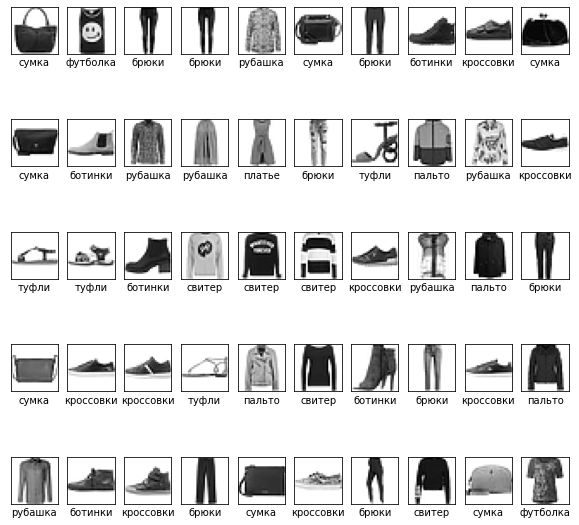

In [11]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [12]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [13]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [14]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [15]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [16]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [17]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [18]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [19]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,  
                    verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 1.4735 - accuracy: 0.5684
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7711 - accuracy: 0.7543
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6568 - accuracy: 0.7933
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6000 - accuracy: 0.8082
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5580 - accuracy: 0.8199
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5398 - accuracy: 0.8229
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.8298
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.8308
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.8327
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 0.4842 - accura

300/300 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8866
Epoch 82/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8865
Epoch 83/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8852
Epoch 84/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.8900
Epoch 85/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.8892
Epoch 86/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8874
Epoch 87/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.8904
Epoch 88/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.8908
Epoch 89/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.8899
Epoch 90/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [20]:
predictions = model.predict(x_train)

**Проверяем качество распознавания**

Просматриваем пример изображения

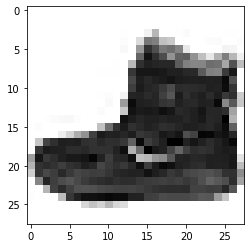

In [21]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [22]:
print(predictions[n])

[1.4485166e-08 5.1952731e-10 1.2851168e-09 7.5888518e-10 4.8118493e-10
 2.2811069e-04 5.5472803e-08 8.7993836e-04 5.5139831e-06 9.9888641e-01]


Определяем номер класса изображения, который предлагает сеть

In [23]:
np.argmax(predictions[n])

9

Печатаем название класса

In [24]:
classes[np.argmax(predictions[n])]

'ботинки'

Печатаем номер класса правильного ответа

In [25]:
np.argmax(y_train[n])

9

Печатаем название класса правильного ответа

In [26]:
classes[np.argmax(y_train[n])]

'ботинки'